## DATA1030 Fall 2025 FInal Project

## Name: Moonhee Kim

## Link to your project github repo: https://github.com/moonheekim6/data1030-fall2025-final-presentation

### Setup

In [47]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.10"):
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "2.2.5", 'matplotlib': "3.10.1",'sklearn': "1.6.1", 
                'pandas': "2.2.3",'xgboost': "3.0.0", 'shap': "0.47.2", 
                'polars': "1.27.1", 'seaborn': "0.13.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.10

[ OK ] numpy version 2.2.5 is installed.
[ OK ] matplotlib version 3.10.1 is installed.
[ OK ] sklearn version 1.6.1 is installed.
[ OK ] pandas version 2.2.3 is installed.
[ OK ] xgboost version 3.0.0 is installed.
[ OK ] shap version 0.47.2 is installed.
[ OK ] polars version 1.27.1 is installed.
[ OK ] seaborn version 0.13.2 is installed.


### Read in data

In [48]:
# your code here
# import the necessary packages. feel free to use pandas or polars, 
# matplotlib, and sklearn
import pandas as pd
import polars as pl
import numpy as np
import matplotlib as plt
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
import sklearn

# read in the dataset
df = pd.read_csv('/Users/moonheekim/Downloads/f25/data1030-fall2025-final-presentation/data/food_order.csv')

# # drop the id and name columns because those are not useful for a machine 
# # learning algorithm
# df = df.drop(columns=['id','name'])

# # prepare the feature matrix X
# X = df.drop(columns=['two_year_recid'])

# # prepare the target variable y
# y = df['two_year_recid']

In [49]:
# check
# print("feature mat shape:", X.shape)
# print("target var shape:", y.shape)

# your code here
# copy-paste the PS3 1a Q0-4 EDA questions here (modify as needed) and 
# answer them.

In [50]:
print(df.columns)

Index(['order_id', 'customer_id', 'restaurant_name', 'cuisine_type',
       'cost_of_the_order', 'day_of_the_week', 'rating',
       'food_preparation_time', 'delivery_time'],
      dtype='object')


In [51]:
# rows and columns do in the dataframe?
print(f'Number of rows: {df.shape[0]}')
print(f'Number of cols: {df.shape[1]}')

Number of rows: 1898
Number of cols: 9


In [60]:
# data types of the columns
pd.set_option('display.max_rows', None) 
print(df.dtypes)

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
has_rating                 int64
dtype: object


In [53]:
# <feature variable exploration>

# .describe or .value_counts

In [54]:
# feature engineer target variable into binary
df['has_rating'] = df['rating'].apply(lambda x: 0 if x == 'Not given' else 1)

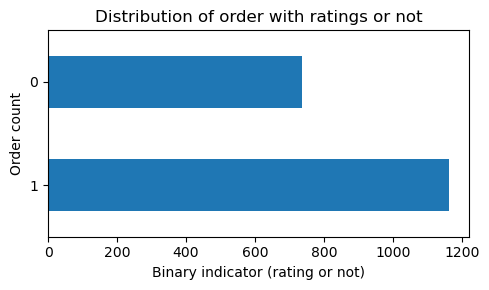

In [55]:
# visualize target variable

plt.figure(figsize=(5,3))
df['has_rating'].value_counts().plot.barh()
plt.xlabel('Binary indicator (rating or not)')
plt.ylabel('Order count')
plt.title('Distribution of order with ratings or not')
plt.tight_layout()
plt.show()

### EDA

In [56]:
# customer id

# 1200 customers, 1898 examples
print(f"Number of unique customers: {df['customer_id'].nunique()}")

Number of unique customers: 1200


Number of restaurants: 178


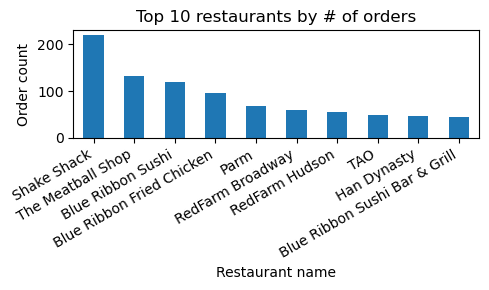

In [57]:
# restaurant name

# 178 restaurants, 1898 examples
print(f"Number of restaurants: {df['restaurant_name'].nunique()}")

restaurant_counts = df['restaurant_name'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(5,3))
restaurant_counts.head(10).plot.bar() # top 10

plt.title('Top 10 restaurants by # of orders')
plt.xlabel('Restaurant name')
plt.ylabel('Order count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


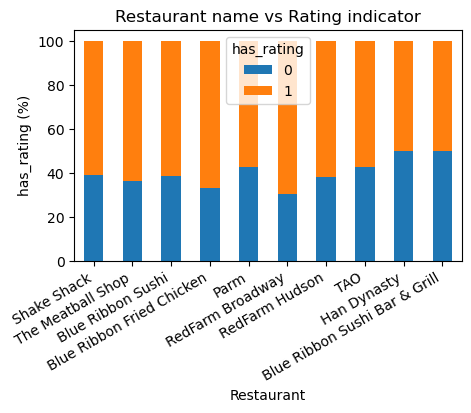

In [79]:
# restaurant name correlation
df_top10 = df[df['restaurant_name'].isin(restaurant_counts.head(10).index)]
rating_counts = df_top10.groupby(['restaurant_name', 'has_rating']).size().unstack(fill_value=0)
rating_counts = rating_counts.loc[rating_counts.sum(axis=1).sort_values(ascending=False).index]
rating_percent = rating_counts.div(rating_counts.sum(axis=1), axis=0) * 100

rating_percent.plot(kind='bar', stacked=True, figsize=(5,3))
plt.xlabel('Restaurant')
plt.ylabel('has_rating (%)')
plt.suptitle('')
plt.xticks(rotation=30, ha='right')
plt.title('Restaurant name vs Rating indicator')
plt.show()


<Figure size 500x300 with 0 Axes>

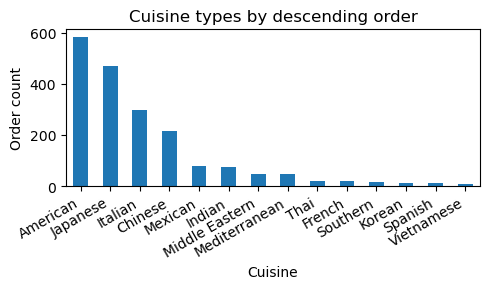

In [22]:
# cuisine types, descending

plt.figure(figsize=(5,3))

cuisine_counts = df['cuisine_type'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(5,3))
cuisine_counts.plot.bar()

plt.title('Cuisine types by descending order')
plt.xlabel('Cuisine')
plt.ylabel('Order count')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


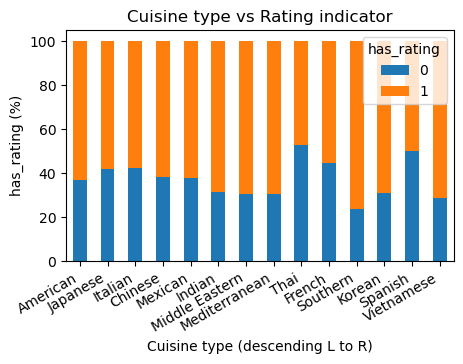

In [78]:
# cuisine type correlation
rating_counts = df.groupby(['cuisine_type', 'has_rating']).size().unstack(fill_value=0)
rating_counts = rating_counts.loc[rating_counts.sum(axis=1).sort_values(ascending=False).index]
rating_percent = rating_counts.div(rating_counts.sum(axis=1), axis=0) * 100

rating_percent.plot(kind='bar', stacked=True, figsize=(5,3))
plt.xlabel('Cuisine type (descending L to R)')
plt.ylabel('has_rating (%)')
plt.suptitle('')
plt.xticks(rotation=30, ha='right')
plt.title('Cuisine type vs Rating indicator')
plt.show()

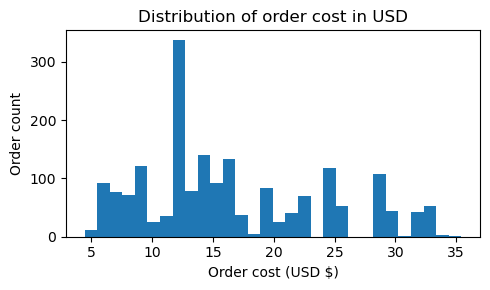

In [27]:
# order cost

plt.figure(figsize=(5,3))
df['cost_of_the_order'].plot.hist(bins = 30)
plt.xlabel('Order cost (USD $)')
plt.ylabel('Order count')
plt.title('Distribution of order cost in USD')
plt.tight_layout()
plt.show()


<Figure size 500x300 with 0 Axes>

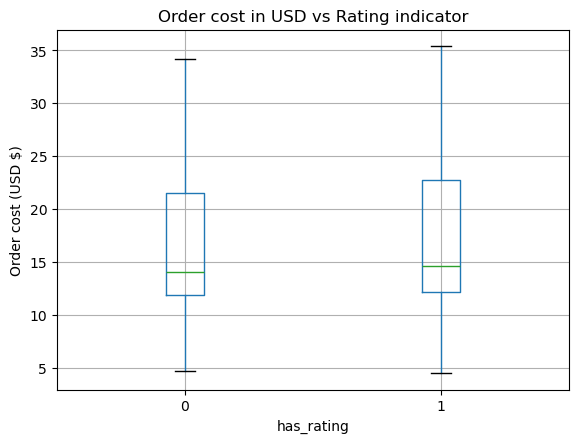

In [70]:
# order cost correlation
plt.figure(figsize=(5,3))
df.boxplot(by='has_rating', column='cost_of_the_order')
plt.xlabel('has_rating')
plt.ylabel('Order cost (USD $)')
plt.suptitle('')
plt.title('Order cost in USD vs Rating indicator')
plt.show()

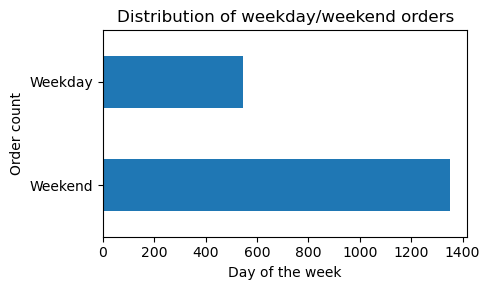

In [28]:
# day of the week
plt.figure(figsize=(5,3))
df['day_of_the_week'].value_counts().plot.barh()
plt.xlabel('Day of the week')
plt.ylabel('Order count')
plt.title('Distribution of weekday/weekend orders')
plt.tight_layout()
plt.show()


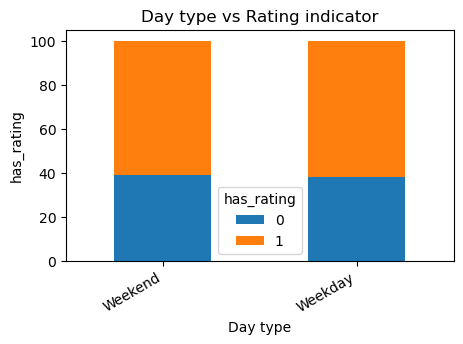

In [77]:
# weekend/weekday order day correlation
rating_counts = df.groupby(['day_of_the_week', 'has_rating']).size().unstack(fill_value=0)
rating_counts = rating_counts.loc[rating_counts.sum(axis=1).sort_values(ascending=False).index]
rating_percent = rating_counts.div(rating_counts.sum(axis=1), axis=0) * 100

rating_percent.plot(kind='bar', stacked=True, figsize=(5,3))
plt.xlabel('Day type')
plt.ylabel('has_rating (%)')
plt.suptitle('')
plt.xticks(rotation=30, ha='right')
plt.title('Day type vs Rating indicator')
plt.show()

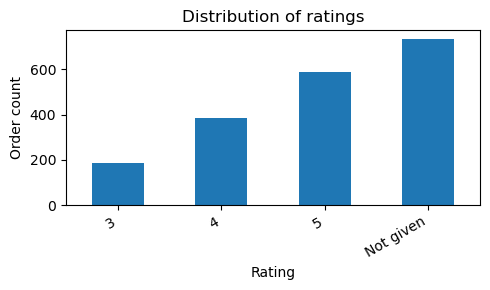

In [76]:
# rating
rating_counts = df['rating'].value_counts().sort_values(ascending=True)

plt.figure(figsize=(5,3))
rating_counts.plot.bar()
plt.xlabel('Rating')
plt.ylabel('Order count')
plt.title('Distribution of ratings')
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()

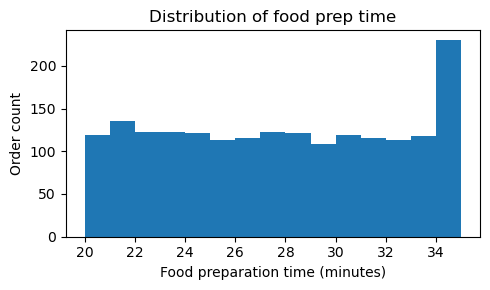

In [38]:
# food prep time

plt.figure(figsize=(5,3))
df['food_preparation_time'].plot.hist(bins = 15)
plt.xlabel('Food preparation time (minutes)')
plt.ylabel('Order count')
plt.title('Distribution of food prep time')

plt.tight_layout()
plt.show()


<Figure size 500x300 with 0 Axes>

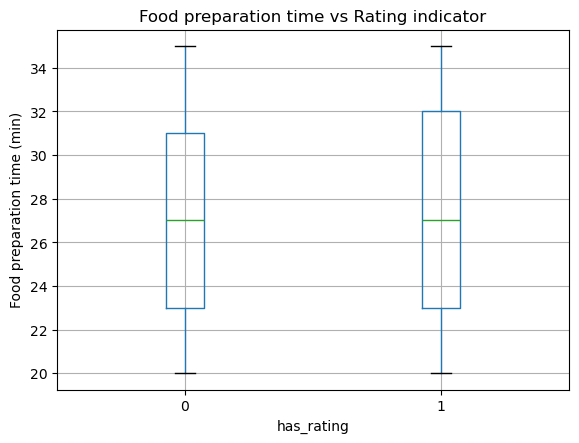

In [80]:
# food prep time correlation
plt.figure(figsize=(5,3))
df.boxplot(by='has_rating', column='food_preparation_time')
plt.xlabel('has_rating')
plt.ylabel('Food preparation time (min)')
plt.suptitle('')
plt.title('Food preparation time vs Rating indicator')
plt.show()

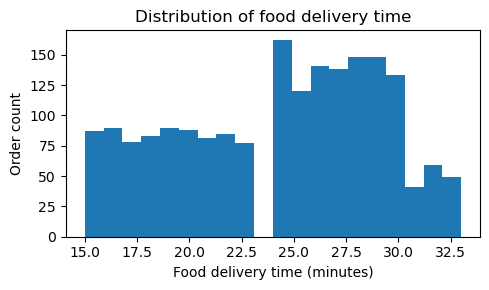

In [41]:
# food delivery time

plt.figure(figsize=(5,3))
df['delivery_time'].plot.hist(bins = 20)
plt.xlabel('Food delivery time (minutes)')
plt.ylabel('Order count')
plt.title('Distribution of food delivery time')

plt.tight_layout()
plt.show()

<Figure size 500x300 with 0 Axes>

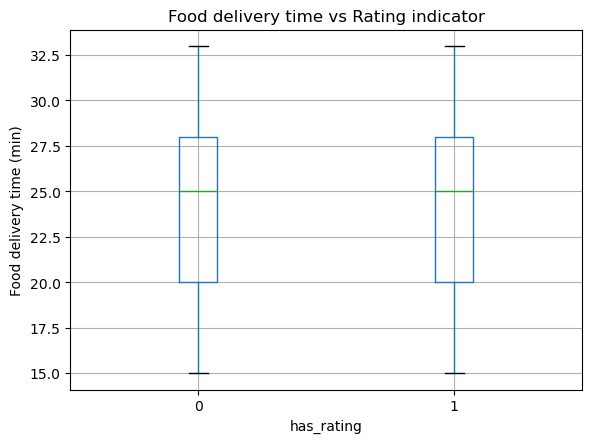

In [81]:
# food delivery time correlation
plt.figure(figsize=(5,3))
df.boxplot(by='has_rating', column='delivery_time')
plt.xlabel('has_rating')
plt.ylabel('Food delivery time (min)')
plt.suptitle('')
plt.title('Food delivery time vs Rating indicator')
plt.show()

In [ ]:
# use sklearn to split the dataset into 60% training, 20% validation, 
# and 20% test sets

# first split to separate out the training set
X_train, X_other, y_train, y_other = train_test_split(X,y,\
                    train_size = 0.6,random_state = 42)
print('training set:',X_train.shape, y_train.shape) # 60% train
print(X_other.shape, y_other.shape) # 40% other

# second split to separate out the validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,\
                    train_size = 0.5,random_state = 42)
print('validation set:',X_val.shape, y_val.shape) # 20% validation
print('test set:',X_test.shape, y_test.shape) # 20% test

In [82]:
# drop the order id and restaurant name columns because those are not useful for a machine 
# learning algorithm
df = df.drop(columns=['order_id','restaurant_name'])

# prepare the feature matrix X
X = df.drop(columns=['has_rating'])

# prepare the target variable y
y = df['has_rating']

## Problem 2

You will preprocess the dataset in this problem. 

- First, you need to decide based on the dataset description, which features are continuous, ordinal, and categorical.
- Then you will write functions that perform fit-transform on the training set. The functions you create are tested with sklearn. The ability to implement algorithms is a strong indicator that you understand them and it is a crucial step in learning.
- Finally, you'll transform the validation and test sets using sklearn.

Follow the steps outined below.

### Problem 2a (10 points)

In [189]:
# import the necesasry packages

# complete these lists. each feature name must appear exactly once in 
# one of these lists
continuous_ftrs = ['cost_of_the_order','food_preparation_time','delivery_time']
ordinal_ftrs = [] 
# for ordinal features, describe the ordered list of categories
ordinal_cats = []
categorical_ftrs = ['restaurant_name','cuisine_type','day_of_the_week']

def standard_scaler(df,continuous_ftrs):
    '''
    TODO: the string between triple quotes is called the docstring of a function.
    you saw examples of this in PS3 already.
    now it is your task to write the docstring!

    Transforms the  continuous features such that each mean = 0 and 
    standard deviation = 1.

    Parameters:
    -----------
    df: a dataframe containing the dataset
    continuous_ftrs: list of str containing feature names to be scaled

    Returns:
    --------
    the dataframe with scaled features

    Example:
    --------
    >>> import numpy as np
    >>> import pandas as pd
    >>>
    >>> df = pd.DataFrame({'age':[1, 2, 3],
                            'sex': ['Male', 'Female', 'Male'],
                            'juv_fel_count': [0, 1, 2]}),
                            'age_cat': ['Greater than 45','25 - 45','25 - 45']})
    >>> continuous_ftrs = ['age','juv_fel_count']
    >>>
    >>> df_scaled = standard_scaler(df,continuous_ftrs)
    '''
    # as in the previous problem set, test the input(s) to the function

    # check that df is a pd or pl dataframe
    if not isinstance(df, (pd.DataFrame, pl.DataFrame)):
        raise ValueError('df must be a pd or pl dataframe.')

    # check that continuous_ftrs is a list
    if not isinstance(continuous_ftrs, list):
        raise ValueError('continuous_ftrs must be a list')

    # check that number of continuous features does not exceed 
    # number of columns in df
    if df.shape[0] < len(continuous_ftrs):
        raise ValueError('# of continuous features cannot exceed \
        number of features in df')

    # check that continuous features exist in df
    for feature in continuous_ftrs:
        if feature not in df.columns:
            raise ValueError(f'{feature} does not exist in dataframe')
    # check that each continuous feature is a string
    for feature in continuous_ftrs:
        if not isinstance(feature, str):
            raise ValueError(f"{feature} must be a string")

    # implement the standard scaler and transform the input
    # you can use numpy, pandas or polars. do not use sklearn inside 
    # the function!

    df_scaled = df.copy()

    for feature in continuous_ftrs:
        mean = df_scaled[feature].mean()
        std_dev = df_scaled[feature].std()
        
        df_scaled[feature] = (df_scaled[feature]-mean) / std_dev

    return df_scaled[continuous_ftrs]


# test the standard scaler output. call the sklearn standard scaler.
# check if the sklearn output and your output are identical
# if not, raise a ValueError and debug your code.
from sklearn.preprocessing import StandardScaler

result1 = standard_scaler(df, continuous_ftrs)
result2 = StandardScaler().fit_transform(df[continuous_ftrs])
# print(f"hard coded: {result1.shape}")
# print(f"sklearn: {result2.shape}")

if np.array_equal(result1.to_numpy(),result2):
    raise ValueError('hardcoded scaler result does not match sklearn result')

### Problem 2b (10 points)

In [190]:
def onehot_encoder(df,categorical_ftrs):
    '''
    TODO: write the docstring of the function.
    Follow the docstring structure in PS3.

    Transforms the  categorical features such that they're classified using
    a 0 or 1 label, where 0 = feature does not exist and 1 = feature exists.

    Parameters:
    -----------
    df: a dataframe containing the dataset
    categorical_ftrs: list of str containing categorical feature names to 
    be one-hot encoded

    Returns:
    --------
    the dataframe with encoded features

    Example:
    --------
    >>> import numpy as np
    >>> import pandas as pd
    >>>
    >>> df = pd.DataFrame({'age':[1, 2, 3],
                            'sex': ['Male', 'Female', 'Male'],
                            'juv_fel_count': [0, 1, 2]}),
                            'age_cat': ['Greater than 45','25 - 45','25 - 45']})
    >>> categorical_ftrs = ['sex']
    >>>
    >>> df_onehot = onehot_encoder(df,categorical_ftrs)
    '''
    # test the input(s)

    # check that df is a pd or pl dataframe
    if not isinstance(df, (pd.DataFrame, pl.DataFrame)):
        raise ValueError('df must be a pd or pl dataframe.')

    # check that categorical_ftrs is a list
    if not isinstance(categorical_ftrs, list):
        raise ValueError('categorical_ftrs must be a list')

    # check that number of categorical features does not exceed 
    # number of columns in df
    if df.shape[0] < len(categorical_ftrs):
        raise ValueError('# of categorical features cannot exceed \
        number of features in df')

    # check that categorical features exist in df
    for feature in categorical_ftrs:
        if feature not in df.columns:
            raise ValueError(f'{feature} does not exist in dataframe')
    # check that each categorical feature is a string
    for feature in categorical_ftrs:
        if not isinstance(feature, str):
            raise ValueError(f"{feature} must be a string")

    # implement the algorithm and transform the input
    # you can use numpy, pandas or polars. do not use sklearn inside the function!

    df_onehot = df.copy()
    df_onehot = pd.get_dummies(df_onehot, columns=categorical_ftrs)

    return df_onehot

# test the one-hot encoder output. call the sklearn OHE.
# check if the sklearn output and your output are identical
# if not, raise a ValueError and debug your code.

from sklearn.preprocessing import OneHotEncoder

result1 = onehot_encoder(df, categorical_ftrs)
result2 = OneHotEncoder().fit_transform(df[continuous_ftrs])
# print(f"hard coded: {result1.shape}")
# print(f"sklearn: {result2.shape}")

if np.array_equal(result1.to_numpy(),result2):
    raise ValueError('hardcoded encoder result does not match sklearn result')

### Problem 2c (10 points)

In [191]:
def ordinal_encoder(df, ordinal_ftrs, ordinal_cats):
    '''
    TODO: write the docstring of the function.
    Follow the docstring structure in PS3.
    Why do we need the ordinal_ftrs and ordinal_cats as inputs?

    Transforms the  categorical features such that they're classified using
    a 0 or 1 label, where 0 = feature does not exist and 1 = feature exists.

    Parameters:
    -----------
    df: a dataframe containing the dataset
    orindal_ftrs: list of str containing ordinal feature names to be
    encoded
    ordinal_cts: list of list of str containing ordered categories for
    features

    ** need both feature list and category list so that we know the order of
    values for each column and "hard-code" the severity/magnitude/size

    Returns:
    --------
    the dataframe with encoded features

    Example:
    --------
    >>> import numpy as np
    >>> import pandas as pd
    >>>
    >>> df = pd.DataFrame({'age':[1, 2, 3],
                            'sex': ['Male', 'Female', 'Male'],
                            'juv_fel_count': [0, 1, 2]}),
                            'age_cat': ['Greater than 45','25 - 45','25 - 45']})
    >>> ordinal_ftrs = ['age_cat']
    >>> ordinal_cats = [['Less than 25','25 - 45','Greater than 45']]
    >>>
    >>> df_ordinal = ordinal_encoder(df,ordinal_ftrs,ordinal_cats)
    '''

    # test the input(s)

    # check that df is a pd or pl dataframe
    if not isinstance(df, (pd.DataFrame, pl.DataFrame)):
        raise ValueError('df must be a pd or pl dataframe.')

    # check that ordinal_ftrs is a list
    if not isinstance(ordinal_ftrs, list):
        raise ValueError('ordinal_ftrs must be a list')

    # check that number of ordinal features does not exceed 
    # number of columns in df
    if df.shape[0] < len(ordinal_ftrs):
        raise ValueError('# of ordinal features cannot exceed \
        number of features in df')

    # check that ordinal features exist in df
    for feature in ordinal_ftrs:
        if feature not in df.columns:
            raise ValueError(f'{feature} does not exist in dataframe')
    # check that each ordinal feature is a string
    for feature in ordinal_ftrs:
        if not isinstance(feature, str):
            raise ValueError(f'{feature} must be a string')

    # check that number of ordinal features matches number of category
    # lists
    if len(ordinal_ftrs) != len(ordinal_cats):
        raise ValueError('number of ordinal features must match \
            number of category lists')

    # check that each ordinal feature category is a string
    for cats in ordinal_ftrs:
        for cat in cats:
            if not isinstance(cat, str):
                raise ValueError(f'{feature} category must be a string')

    # implement the algorithm and transform the input
    # you can use numpy, pandas or polars. do not use sklearn inside 
    # the function!

    df_ordinal = df.copy()

    for feature, cats in zip(ordinal_ftrs, ordinal_cats):
        ordinal_vals = {cat: idx for idx, cat in enumerate(cats)}
        df_ordinal[feature] = df_ordinal[feature].map(ordinal_vals)

    return df_ordinal

# test the ordinal encoder output. call the sklearn OE.
# check if the sklearn output and your output are identical
# if not, raise a ValueError and debug your code.

from sklearn.preprocessing import OrdinalEncoder

result1 = ordinal_encoder(df, ordinal_ftrs, ordinal_cats)
result2 = OrdinalEncoder(categories=ordinal_cats).\
    fit_transform(df[ordinal_ftrs])
# print(f"hard coded: {result1.shape}")
# print(f"sklearn: {result2.shape}")

if np.array_equal(result1.to_numpy(),result2):
    raise ValueError('hardcoded encoder result does not match sklearn result')


In [192]:
# now, please combine your three functions to create a df that is fully transformed
def preprocess(df, continuous_ftrs, categorical_ftrs, ordinal_ftrs, ordinal_cats):
  '''
  Full preprocessing pipeline that:
  - Transforms the  continuous features such that each mean = 0 and 
  standard deviation = 1.
  - Transforms the  categorical features such that they're classified using
  a 0 or 1 label, where 0 = feature does not exist and 1 = feature exists.
  - Transforms the  categorical features such that they're classified using
  a 0 or 1 label, where 0 = feature does not exist and 1 = feature exists.

  Parameters:
  -----------
  df: a dataframe containing the dataset
  continuous_ftrs: list of str containing feature names to be scaled
  categorical_ftrs: list of str containing categorical feature names to 
  be one-hot encoded
  orindal_ftrs: list of str containing ordinal feature names to be
  encoded
  ordinal_cts: list of list of str containing ordered categories for
  features

  ** need both feature list and category list so that we know the order of
  values for each column and "hard-code" the severity/magnitude/size

  Returns:
  --------
  the fully preprocessed dataframe with scaled/encoded features

  Example:
  --------
  >>> import numpy as np
  >>> import pandas as pd
  >>>
  >>> df = pd.DataFrame({'age':[1, 2, 3],
                          'sex': ['Male', 'Female', 'Male'],
                          'juv_fel_count': [0, 1, 2]}),
                          'age_cat': ['Greater than 45','25 - 45','25 - 45']})
  >>> continuous_ftrs = ['age','juv_fel_count']
  >>> categorical_ftrs = ['sex']
  >>> ordinal_ftrs = ['age_cat']
  >>> ordinal_cats = [['Less than 25','25 - 45','Greater than 45']]
  >>>
  >>> df_final = preprocess(df,continuous_ftrs,categorical_ftrs,\
    ordinal_ftrs,ordinal_cats)
  '''

  # check that df is a pd or pl dataframe
  if not isinstance(df, (pd.DataFrame, pl.DataFrame)):
      raise ValueError('df must be a pd or pl dataframe.')

  # check that continuous_ftrs is a list
  if not isinstance(continuous_ftrs, list):
      raise ValueError('continuous_ftrs must be a list')

  # check that number of continuous features does not exceed 
  # number of columns in df
  if df.shape[0] < len(continuous_ftrs):
      raise ValueError('# of continuous features cannot exceed \
      number of features in df')

  # check that continuous features exist in df
  for feature in continuous_ftrs:
      if feature not in df.columns:
          raise ValueError(f'{feature} does not exist in dataframe')
  # check that each continuous feature is a string
  for feature in continuous_ftrs:
      if not isinstance(feature, str):
          raise ValueError(f"{feature} must be a string")

  # check that categorical_ftrs is a list
  if not isinstance(categorical_ftrs, list):
      raise ValueError('categorical_ftrs must be a list')

  # check that number of categorical features does not exceed 
  # number of columns in df
  if df.shape[0] < len(categorical_ftrs):
      raise ValueError('# of categorical features cannot exceed \
      number of features in df')

  # check that categorical features exist in df
  for feature in categorical_ftrs:
      if feature not in df.columns:
          raise ValueError(f'{feature} does not exist in dataframe')
  # check that each categorical feature is a string
  for feature in categorical_ftrs:
      if not isinstance(feature, str):
          raise ValueError(f"{feature} must be a string")

  # check that ordinal_ftrs is a list
  if not isinstance(ordinal_ftrs, list):
      raise ValueError('ordinal_ftrs must be a list')

  # check that number of ordinal features does not exceed 
  # number of columns in df
  if df.shape[0] < len(ordinal_ftrs):
      raise ValueError('# of ordinal features cannot exceed \
      number of features in df')

  # check that ordinal features exist in df
  for feature in ordinal_ftrs:
      if feature not in df.columns:
          raise ValueError(f'{feature} does not exist in dataframe')
  # check that each ordinal feature is a string
  for feature in ordinal_ftrs:
      if not isinstance(feature, str):
          raise ValueError(f'{feature} must be a string')

  # check that number of ordinal features matches number of category
  # lists
  if len(ordinal_ftrs) != len(ordinal_cats):
      raise ValueError('number of ordinal features must match \
          number of category lists')

  # check that each ordinal feature category is a string
  for cats in ordinal_ftrs:
      for cat in cats:
          if not isinstance(cat, str):
              raise ValueError(f'{feature} category must be a string')

  df_final = df.copy()

  for feature in continuous_ftrs:
    mean = df_final[feature].mean()
    std_dev = df_final[feature].std()
    
    df_final[feature] = (df_final[feature]-mean) / std_dev

  df_final = pd.get_dummies(df_final, columns=categorical_ftrs)

  for feature, cats in zip(ordinal_ftrs, ordinal_cats):
    ordinal_vals = {cat: idx for idx, cat in enumerate(cats)}
    df_final[feature] = df_final[feature].map(ordinal_vals)

  
  return df_final
  
# test this

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'),\
           categorical_ftrs),
        ('std', StandardScaler(), continuous_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)])

result1 = preprocess(df,continuous_ftrs,categorical_ftrs,\
    ordinal_ftrs,ordinal_cats)
result2 = clf.fit_transform(df)

# print(f"hard coded: {result1.shape}")
# print(f"sklearn: {result2.shape}")

if np.array_equal(result1.to_numpy(),result2):
    raise ValueError('hardcoded preprocesser result does not match \
        sklearn result')

### Problem 2d (5 points)

In [193]:
# test 1: use the sklearn transformers you prepared to test your functions 
# and transform the validation and test sets.
# make sure that the transformed train/val/test you prepared are identical to 
# the sklearn transformed sets
# if the sets are not identical, carefully read the manuals of all functions 
# and methods that you use.

X_train_prep = clf.fit_transform(X_train)
X_train_prep = pd.DataFrame(data=X_train_prep,\
  columns=preprocessor.get_feature_names_out())
X_val_prep = clf.transform(X_val)
X_val_prep = pd.DataFrame(data=X_val_prep,\
  columns=preprocessor.get_feature_names_out())
X_test_prep = clf.transform(X_test)
X_test_prep = pd.DataFrame(data=X_test_prep,\
  columns=preprocessor.get_feature_names_out())

# test 2: print out the headers of the fully transformed train, validation, 
# and test sets

print("preprocessed X train:")
print(X_train_prep.head())
print("preprocessed X val")
print(X_val_prep.head())
print("preprocessed X test:")
print(X_test_prep.head())

# test 3: make sure that the order of the features is exactly the same in 
# each set

assert (X_train_prep.columns == X_val_prep.columns).all()
assert (X_train_prep.columns == X_test_prep.columns).all()
assert (X_val_prep.columns == X_test_prep.columns).all()


preprocessed X train:
   ord__age_cat  onehot__sex_Female  ...  std__r_days_from_arrest  std__custody_days
0           2.0                 0.0  ...                      NaN          -0.236335
1           2.0                 1.0  ...                      NaN                NaN
2           1.0                 0.0  ...                      NaN          -0.148714
3           1.0                 0.0  ...                      NaN                NaN
4           2.0                 1.0  ...                      NaN          -0.210564

[5 rows x 17 columns]
preprocessed X val
   ord__age_cat  onehot__sex_Female  ...  std__r_days_from_arrest  std__custody_days
0           1.0                 0.0  ...                      NaN           0.691410
1           0.0                 0.0  ...                -0.275007          -0.215718
2           0.0                 0.0  ...                -0.275007          -0.215718
3           2.0                 1.0  ...                      NaN          -0.226026
4